In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097

In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

scatter plot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

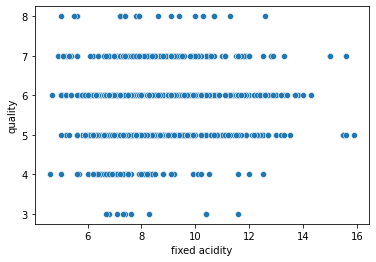

In [8]:
sns.scatterplot(x='fixed acidity',y='quality',data=df)

when fixed acidity is in between 4-14 than the quality of wine is average 

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

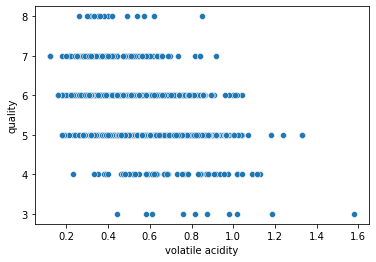

In [9]:
sns.scatterplot(x='volatile acidity',y='quality',data=df)

we can see when the volatile acidity comes in range between 2-12 the quality of wine is good

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

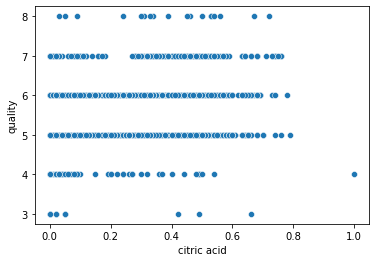

In [10]:
sns.scatterplot(x='citric acid',y='quality',data=df)

when the citric acid is 0.0-0.8 then the quality is 5-6

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

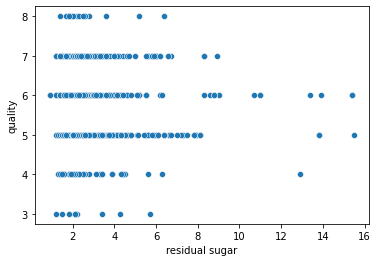

In [11]:
sns.scatterplot(x='residual sugar',y='quality',data=df)

when the residual sugar is 1-8 then max quality ia 5-7

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

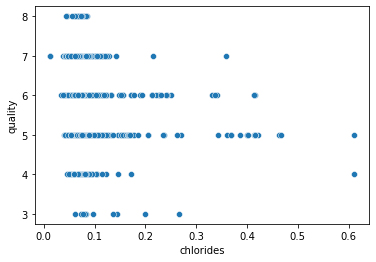

In [12]:
sns.scatterplot(x='chlorides',y='quality',data=df)

quality is good when chloride acid is 0.05-0.3

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

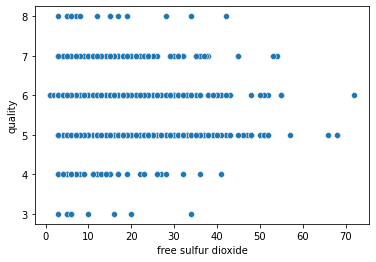

In [13]:
sns.scatterplot(x='free sulfur dioxide',y='quality',data=df)

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

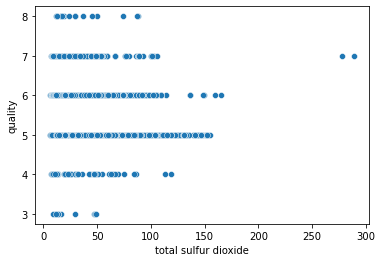

In [14]:
sns.scatterplot(x='total sulfur dioxide',y='quality',data=df)

<AxesSubplot:xlabel='density', ylabel='quality'>

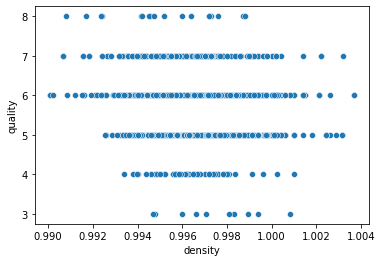

In [15]:
sns.scatterplot(x='density',y='quality',data=df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

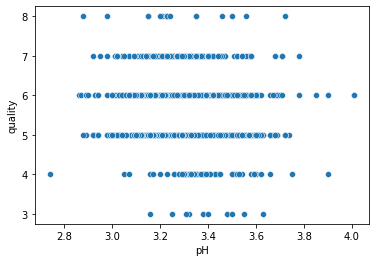

In [16]:
sns.scatterplot(x='pH',y='quality',data=df)

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

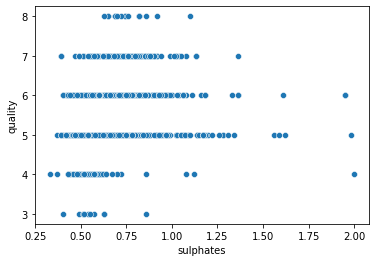

In [17]:
sns.scatterplot(x='sulphates',y='quality',data=df)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

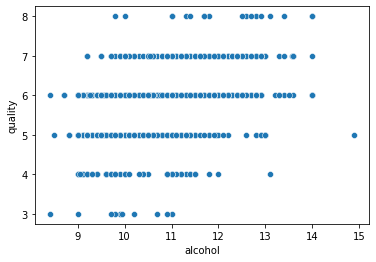

In [18]:
sns.scatterplot(x='alcohol',y='quality',data=df)

# correlation

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


correlation using heatmap

<AxesSubplot:>

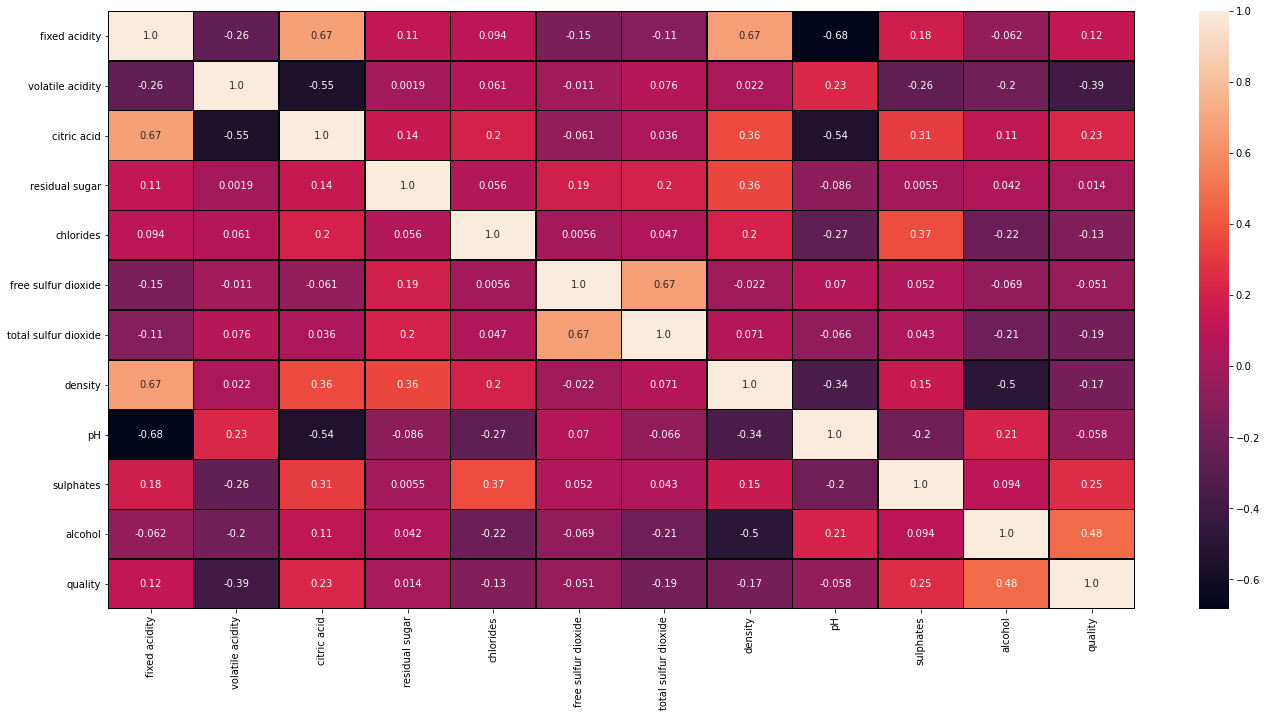

In [20]:
plt.figure(figsize=(23,11))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.02')
           

# outcome of correlation

max correlation = pH                                                                                                                                                                                                                                           
min correlation = fixed acidity

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<function matplotlib.pyplot.show(close=None, block=None)>

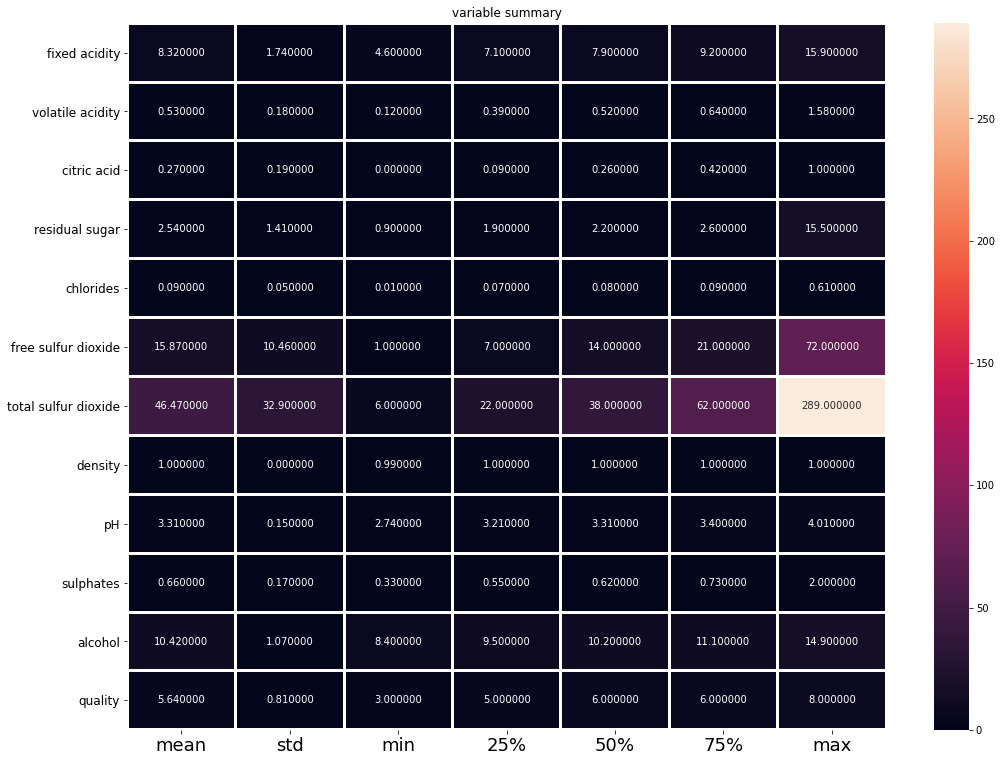

In [22]:
plt.figure(figsize=(17,13))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show

# outcome

In [23]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097

# outliers checking

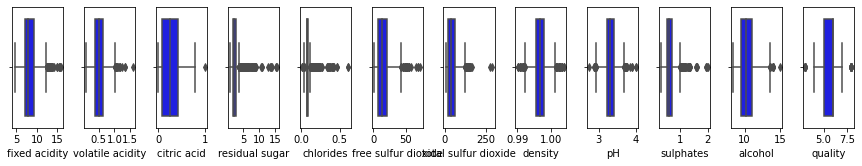

In [24]:
collist=df.columns.values
ncol=30
nrows=40
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

we can see the colomns have more outliers while the outcome colomn have no outliers

In [25]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

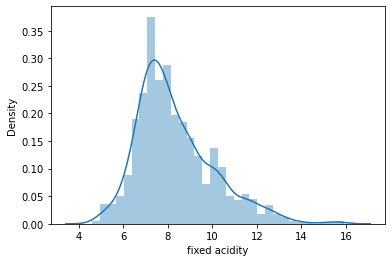

In [26]:
sns.distplot(df['fixed acidity'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

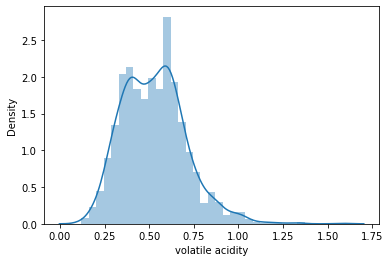

In [27]:
sns.distplot(df['volatile acidity'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

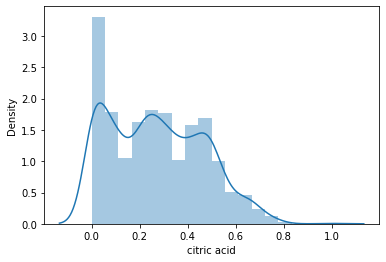

In [28]:
sns.distplot(df['citric acid'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

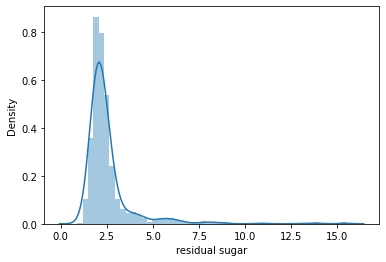

In [29]:
sns.distplot(df['residual sugar'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

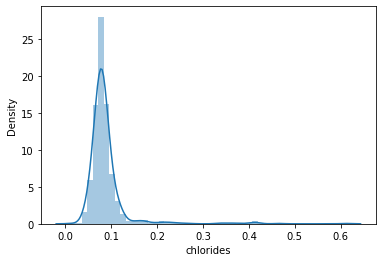

In [30]:
sns.distplot(df['chlorides'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

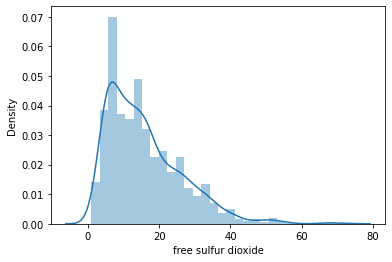

In [31]:
sns.distplot(df['free sulfur dioxide'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

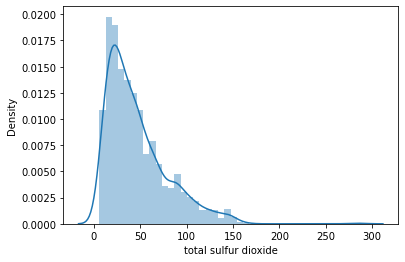

In [32]:
sns.distplot(df['total sulfur dioxide'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='density', ylabel='Density'>

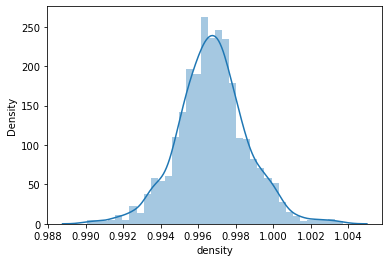

In [33]:
sns.distplot(df['density'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='pH', ylabel='Density'>

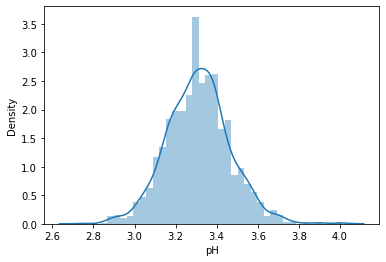

In [34]:
sns.distplot(df['pH'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

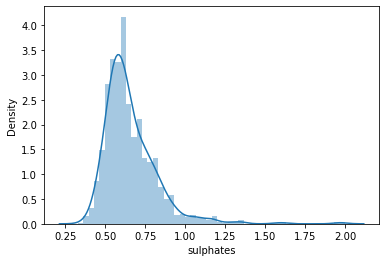

In [35]:
sns.distplot(df['sulphates'])

the data is not normalised.the building curve is out of the normalised curve

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

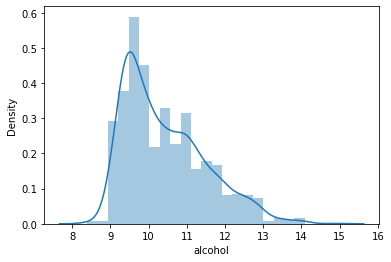

In [36]:
sns.distplot(df['alcohol'])

the data is not normalised.the building curve is out of the normalised curve

the normal distribution curve is irrelevant

the normal distribution shows the the data is skewed

# data cleaning

In [37]:
df.drop(['residual sugar','chlorides','density'],axis=1)

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,25.0,67.0,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,15.0,54.0,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,17.0,60.0,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,11.0,34.0,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,13.0,40.0,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,15.0,59.0,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,15.0,21.0,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,9.0,18.0,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,17.0,102.0,3.35,0.80,10.500000,5


# removing outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(df))
z.shape

(1599, 12)

In [40]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [41]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1451, 12)


In [42]:
x= df_new.iloc[:,:-1]
y= df_new.iloc[:,-1]

# transforming data for removing skewness

In [43]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.46787818,  1.05573967, -1.52450588, ...,  1.36086042,
        -0.58965734, -1.12042399],
       [-0.17080535,  1.91974976, -1.52450588, ..., -0.81650738,
         0.45152416, -0.5303401 ],
       [-0.17080535,  1.35706712, -1.24543379, ..., -0.38097654,
         0.22000451, -0.5303401 ],
       ...,
       [-1.45100718, -0.00286664, -0.66625579, ...,  0.74685493,
         0.93043194,  0.74288203],
       [-1.88546393,  0.76651828, -0.72755539, ...,  1.76243705,
         0.666655  , -0.03416625],
       [-1.7722373 , -1.33320495,  1.07130142, ...,  0.53899166,
         0.29909273,  0.74288203]])

In [44]:
from sklearn.preprocessing import standardscaler
sc=standardscaler()
x=sc.fit_transform(x)
x

ImportError: cannot import name 'standardscaler' from 'sklearn.preprocessing' (C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

# since the outcame have only two variable we will use binary classification model 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# splitting the dataframe

In [46]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i, "The model perform very well")
        print('At random_state:-',i)
        print('Training r2_score is:-',accuracy_score(y_train,pred_train)*100)
        print('Testing r2_score is:-',accuracy_score(y_test,pred_test)*100)

At random state 221 The model perform very well
At random_state:- 221
Training r2_score is:- 61.46551724137931
Testing r2_score is:- 61.512027491408936
At random state 235 The model perform very well
At random_state:- 235
Training r2_score is:- 60.51724137931035
Testing r2_score is:- 60.48109965635739
At random state 308 The model perform very well
At random_state:- 308
Training r2_score is:- 61.206896551724135
Testing r2_score is:- 61.16838487972509
At random state 316 The model perform very well
At random_state:- 316
Training r2_score is:- 61.206896551724135
Testing r2_score is:- 61.16838487972509
At random state 420 The model perform very well
At random_state:- 420
Training r2_score is:- 61.206896551724135
Testing r2_score is:- 61.16838487972509
At random state 465 The model perform very well
At random_state:- 465
Training r2_score is:- 60.775862068965516
Testing r2_score is:- 60.824742268041234
At random state 617 The model perform very well
At random_state:- 617
Training r2_score 

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=899)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.39      0.46      0.42       116
           6       0.44      0.46      0.45       128
           7       0.10      0.05      0.07        37
           8       0.00      0.00      0.00         1

    accuracy                           0.39       291
   macro avg       0.19      0.19      0.19       291
weighted avg       0.36      0.39      0.37       291



# cross validation score for logistic regression

In [49]:
pred_lr= lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

Cross validation score is:- 54.17070390424623
accuracy_score is:- 64.26116838487972


Cross validation score is:- 56.71922499985741
accuracy_score is:- 64.26116838487972


Cross validation score is:- 57.75535363682024
accuracy_score is:- 64.26116838487972


Cross validation score is:- 56.930441995497084
accuracy_score is:- 64.26116838487972


Cross validation score is:- 57.06708731982213
accuracy_score is:- 64.26116838487972


Cross validation score is:- 57.346578542230716
accuracy_score is:- 64.26116838487972


Cross validation score is:- 57.6247647380244
accuracy_score is:- 64.26116838487972


Cross validation score is:- 58.102650614727914
accuracy_score is:- 64.26116838487972




cv score and accuracy score are almost same

# AUC ROC CURVE

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, lebel='ROC curve(area = %0.2f )' %roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw=10, linestyle='- -')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Position Rate')
plt.ylabel('True Position Rate')
plt.titles('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()



ValueError: multiclass format is not supported

# model saving

In [51]:
import pickle
filename='wine quality.pkl'
pickle.dump(lr, open(filename, 'wb'))